# INTRODUCTION

This analysis is to examine if any correlation exists between Christopher Walken's movie career and use of cowbell in popular music.

![SegmentLocal](walken.gif "segment")

# METHODOLOGY

## Collect Data

### Christopher Walken's Film Career

The website https://www.rottentomatoes.com/celebrity/christopher_walken was accessed on 10/13/2021. The film list was not so large that it was necessary to use other tools to collect information, so the list was transferred to a spreadsheet, fields with "No Score Yet" or a "-" in the Box Office revenue were deleted. 

### Cowbell Songs

**UltimateCowbell.com**

The best resource with complete listings of cowbell songs was http://ultimatecowbell.com. Smaller lists are available with a much smaller sample size, typically ranging from 10-12 songs. Much more data was needed to determine any patterns that may occur. Note: Some of these entries have explicit language.

Also, the year each song was published would be required to plot correctly against Walken's career. UltimateCowbell only provided the song details with the year as a separate page per song ([see example here](http://ultimatecowbell.com/songview.php?idsongperm=718)). Since the site had well over 4000 entries, the easiest method was to create a web scraper, move the information to a database and write a CSV. The code for the web scraper can be found in `cowbell.py`. Website accessed on 10/14/2021.

**RollingStone.com**

The UltimateCowbell.com list was longer than necessary. The data I am interested in is with mainstream music, across genres such as pop, country, rock, or alternative. I wanted to reduce the data without my own editing or bias, so I located a list of songs to cross-reference and make a new dataframe with those that contained cowbell.  

Rolling Stone magazine recently released an updated list of ["The 500 Greatest Songs of All Time"](https://www.rollingstone.com/music/music-lists/best-songs-of-all-time-1224767/kanye-west-stronger-1224837/) on 9/15/2021. The website is dynamic, so my previous webscraper wouldn't load the HTML needed. Since the list is only across 10 webpages, I made a web scraper to run in the website console that would return the artist, song title and year. I copied these fields into a CSV.

**Other**

The resulting list between the two aforementioned was still a small amount of data. I manually made a spreadsheet with some songs from the smaller "Best of Cowbell" lists mentioned above. 

[A to Z Songs that were Made Great by the Cowbell](https://medium.com/@s3605546/a-to-z-songs-that-were-made-great-by-the-cowbell-3734dd3a3535)

[Friday Top: 25 Best Songs with Cowbell](https://www.ultimate-guitar.com/articles/features/friday_top_25_best_songs_with_cowbell-112673)

# RESULTS

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Use pandas to read CSV
walken = pd.read_csv('./csv/c_walken.csv')

In [3]:
# Check df
walken

,Critics_Score,Audience_Score,Title,Character,Box_Revenue,Year
0,0.29,0.85,The War With Grandpa,Jerry,$21.3M,2020
1,0.25,0.52,Wild Mountain Thyme,Tony Reilly,$194.9K,2020
2,0.20,NaN,The Jesus Rolls,Warden,NaN,2019
3,0.32,0.60,Irreplaceable You,Unknown,NaN,2018
4,0.17,0.25,Father Figures,Dr. Walter Tinkler,$16.8M,2017
...,...,...,...,...,...,...
106,0.96,0.92,Annie Hall,Duane Hall,NaN,1977
107,0.80,0.64,"Next Stop, Greenwich Village",Robert Fulmer,NaN,1976
108,NaN,0.46,The Mind Snatchers,Privatz James H. Reese,NaN,1972
109,0.74,0.54,The Anderson Tapes,The Kid,NaN,1971


In [4]:
# Copy Revenue column
walken['box'] = walken['Box_Revenue']


# Replace $ and - in copied column
walken['box'] = walken['box'].str.replace('$', '')
walken['box'] = walken['box'].str.replace('-', 'NaN')


# Replace M and K with corresponding 0s
walken['box'] = walken['box'].replace(r'[KM]+$', '', regex=True).astype(float) * \
(walken['box'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))


# Check Work
total_revenue = walken['box'].sum()
total_formatted = "{:,}".format(total_revenue)

print(walken['box'][0])
print(f"Christopher Walken's movies have made a combined ${total_formatted}")

21300000.0
Christopher Walken's movies have made a combined $2,170,409,000.0


C:\Users\annee\AppData\Local\Temp/ipykernel_16592/3280905787.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  walken['box'] = walken['box'].str.replace('$', '')


In [5]:
# Add movie revenue if in the same year
walken['year_sum'] = walken.groupby(['Year'])['box'].transform(sum)


#Check work
walken[:10]

,Critics_Score,Audience_Score,Title,Character,Box_Revenue,Year,box,year_sum
0,0.29,0.85,The War With Grandpa,Jerry,$21.3M,2020,21300000.0,21494900.0
1,0.25,0.52,Wild Mountain Thyme,Tony Reilly,$194.9K,2020,194900.0,21494900.0
2,0.20,NaN,The Jesus Rolls,Warden,NaN,2019,NaN,0.0
3,0.32,0.60,Irreplaceable You,Unknown,NaN,2018,NaN,0.0
4,0.17,0.25,Father Figures,Dr. Walter Tinkler,$16.8M,2017,16800000.0,16800000.0
5,0.94,0.86,The Jungle Book,King Louie,$364.0M,2016,364000000.0,399400000.0
6,0.14,0.41,Nine Lives,Felix Perkins,$19.6M,2016,19600000.0,399400000.0
7,0.81,0.82,Eddie the Eagle,Warren Sharp,$15.8M,2016,15800000.0,399400000.0
8,0.10,0.21,Joe Dirt 2: Beautiful Loser,Clem,NaN,2015,NaN,240100.0
9,0.53,0.26,One More Time,Paul,NaN,2015,NaN,240100.0


In [6]:
# Sort by box office totals
box_sorted = walken.sort_values(by='box', ascending=True) 
box_sorted

,Critics_Score,Audience_Score,Title,Character,Box_Revenue,Year,box,year_sum
73,0.20,0.33,A Business Affair,Vanni Corso,$2.8K,1994,2800.0,2800.0
57,0.19,0.38,New Rose Hotel,Fox,$20.4K,1998,20400.0,91557000.0
14,0.50,0.38,The Power of Few,Doke,$22.1K,2013,22100.0,22100.0
80,0.72,0.38,Mistress,Warren Zell,$53.6K,1992,53600.0,160353600.0
92,NaN,0.43,Deadline,Don Stevens,$86.7K,1987,86700.0,86700.0
...,...,...,...,...,...,...,...,...
106,0.96,0.92,Annie Hall,Duane Hall,NaN,1977,NaN,0.0
107,0.80,0.64,"Next Stop, Greenwich Village",Robert Fulmer,NaN,1976,NaN,0.0
108,NaN,0.46,The Mind Snatchers,Privatz James H. Reese,NaN,1972,NaN,0.0
109,0.74,0.54,The Anderson Tapes,The Kid,NaN,1971,NaN,0.0


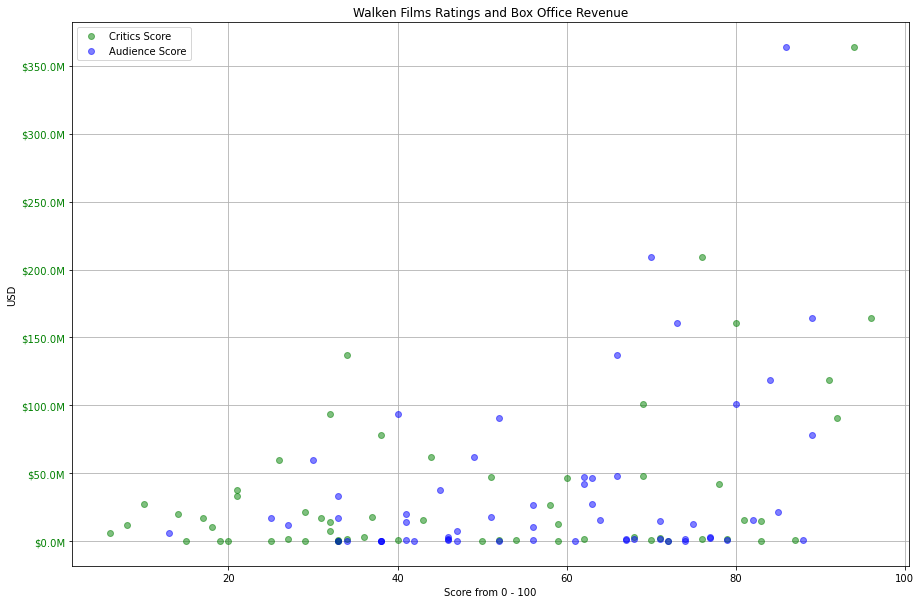

In [7]:
subset = ['Critics_Score', 'Audience_Score', 'box']

# Define X and Y
# Must have values in Critics_Score, Audience_Score and box to be included
x = box_sorted.dropna(subset=subset).Critics_Score * 100
x2 = (box_sorted.dropna(subset=subset).Audience_Score) * 100
y = box_sorted.dropna(subset=subset).box


# Subplots
fig, ax = plt.subplots(figsize=(15,10))


# Title
ax.set_title('Walken Films Ratings and Box Office Revenue')


# X and Y Axis Labels
plt.xlabel('Score from 0 - 100')
plt.ylabel('USD') 


# Information to Graph
ax.plot(x, y, 'go', alpha=0.5, label='Critics Score')
ax.plot(x2, y, 'bo', alpha=0.5, label='Audience Score')


# Y ticks
def millions(x, pos):
    """The two args are the value and tick position."""
    return '${:1.1f}M'.format(x*1e-6)

ax.yaxis.set_major_formatter(millions)
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)


# Show legend
ax.legend()

# Show grid
ax.grid()

# Remove text output
plt.show()

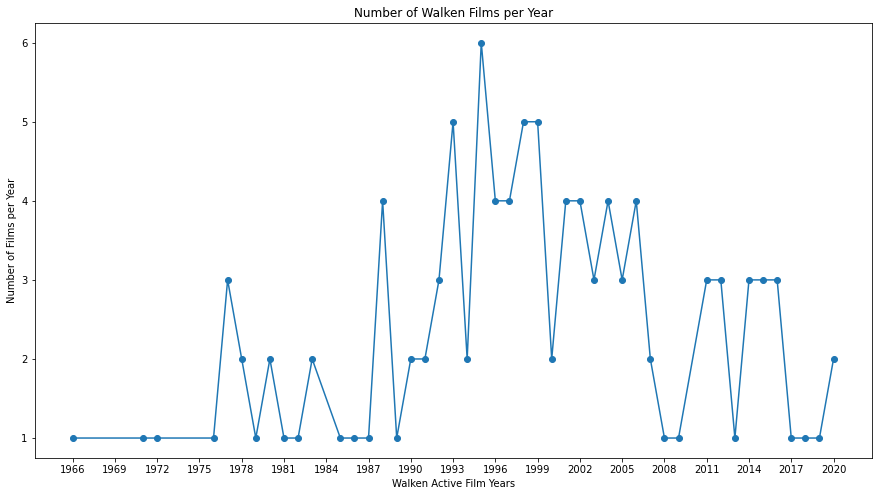

In [8]:
# Sort by year
year_sorted = walken.sort_values(by='Year', ascending=True) 


# Adjust size
plt.figure(figsize=(15,8))


# Title
plt.title('Number of Walken Films per Year')


# Define X and Y
x = year_sorted['Year'].unique()
y = year_sorted['Year'].value_counts().sort_index()


# X and Y Axis Labels
plt.xlabel('Walken Active Film Years')
plt.ylabel('Number of Films per Year') 


# X Ticks- Every three years
plt.xticks(np.arange(min(x), max(x)+1, 3.0))


# Plot the graph
plt.plot(x, y, marker='o')
plt.show()

In [9]:
# Import CSV of all cowbell songs
songs = pd.read_csv('./csv/cowbell1_4247.csv')


# Remove extra quote in string
songs['Song'] = songs['Song'].str.replace('"', '')
songs['Band'] = songs['Band'].str.replace('"', '')


# Exclude songs without a year
songs = songs.loc[songs["Year"] != 0]
songs = songs.loc[songs["Year"] != 'nan']


# Check data
songs[:10]

,Band,Song,Album,Record_Company,Year
0,!!!,Me and Giuliani Down by the School Yard (A Tru...,Me and Giuliani Down by the School Yard (A Tru...,Touch and Go,2003.0
1,!!!,Hammerhead,!!!,Gold Standard Labs,2000.0
2,...And You Will Know Us by the Trail of Dead,Open Doors,Lost Songs,Richter Scale / Superball Music,2012.0
3,Weird Al Yankovic,Amish Paradise [Coolio featuring LV],Bad Hair Day,Scotti Bros.,1996.0
4,Weird Al Yankovic,Money for Nothing / Beverly Hillbillies [Dire ...,UHF: Original Motion Picture Soundtrack,Columbia,1989.0
5,Weird Al Yankovic,Pretty Fly For a Rabbi [The Offspring],Running With Scissors,Volcano,1999.0
6,Weird Al Yankovic,This Is the Life,Dare to Be Stupid,Scotti Bros.,1985.0
7,Weird Al Yankovic,Trash Day [Nelly],Poodle Hat,Volcano,2003.0
8,Weird Al Yankovic,Close but No Cigar,Straight Outta Lynwood,Volcano,2006.0
9,Weird Al Yankovic,Polka Face,Alpocalypse,Volcano,2011.0


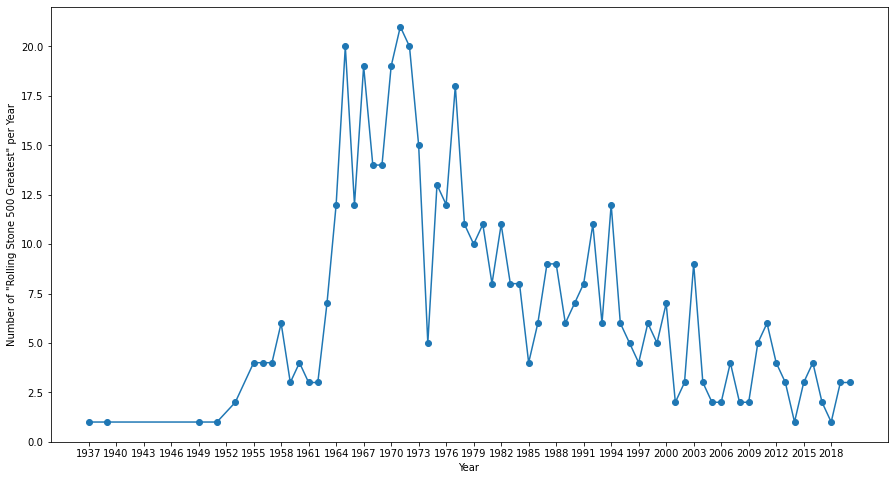

In [10]:
# Import Rolling Stone's Top 500 list
rs500 = pd.read_csv('./csv/rs500.csv')


# Sort by year
year_500 = rs500.sort_values(by='year', ascending=True) 


# Adjust size
plt.figure(figsize=(15,8))


# Define X and Y
x = year_500['year'].unique()
y = year_500['year'].value_counts().sort_index()


# X and Y Axis Labels
plt.xlabel('Year')
plt.ylabel('Number of "Rolling Stone 500 Greatest" per Year') 


# X Ticks- Every three years
plt.xticks(np.arange(min(x), max(x)+1, 3.0))


# Plot the graph
plt.plot(x, y, marker='o')
plt.show()

In [11]:
print(rs500.song[60])

rs500['song'] = rs500['song'].str.replace(r"[\"\',']", "")
songs['Song'] = songs['Song'].str.replace(r"[\"\',']", "")
print(rs500.song[60])

print(songs.Song[442])
print(rs500.song[51])


If I Ain't Got You'
If I Aint Got You
(Dont Fear) The Reaper
(Dont Fear) The Reaper


C:\Users\annee\AppData\Local\Temp/ipykernel_16592/1333973672.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  rs500['song'] = rs500['song'].str.replace(r"[\"\',']", "")
C:\Users\annee\AppData\Local\Temp/ipykernel_16592/1333973672.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  songs['Song'] = songs['Song'].str.replace(r"[\"\',']", "")


In [12]:
# Find songs that are in both CSVs
combo = rs500[rs500['song'].isin(songs.Song)].sort_values(by='artist', ascending=True) 


# Make a new df
newlist = pd.DataFrame(data=combo, columns=['artist', 'song', 'year'])

In [13]:
# Read CSV
extrabell = pd.read_csv('./csv/extra_cowbell.csv')


# Make final df of cowbell songs
frames = [newlist, extrabell]

final_list = pd.concat(frames)

final_list_year = final_list.sort_values(by='year', ascending=True) 

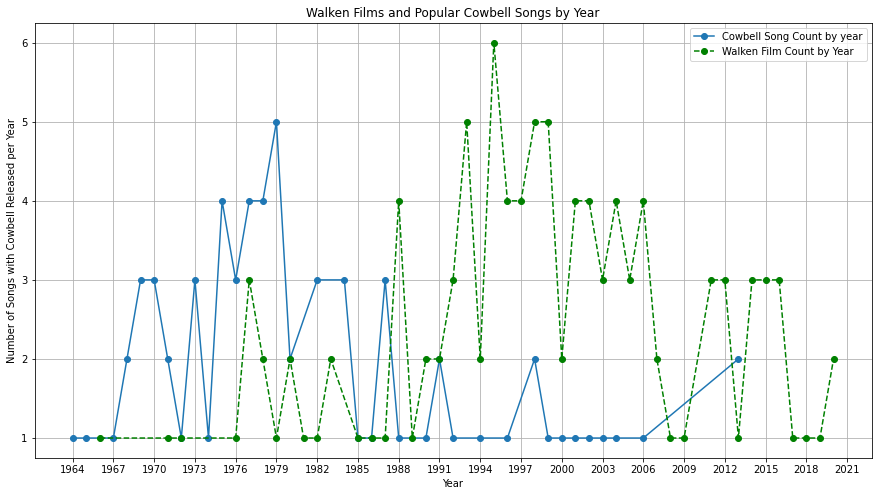

In [14]:
# Adjust size
plt.figure(figsize=(15,8))


# Define X and Y
# Cowbell songs by year / count
x = final_list_year['year'].unique()
y = final_list_year['year'].value_counts().sort_index()
# Walken films by year / count
x2 = year_sorted['Year'].unique()
y2 = year_sorted['Year'].value_counts().sort_index()


# Title 
plt.title('Walken Films and Popular Cowbell Songs by Year')


# X and Y Axis Labels
plt.xlabel('Year')
plt.ylabel('Number of Songs with Cowbell Released per Year') 


# X Ticks- Every three years
plt.xticks(np.arange(min(x), max(x)+10, 3.0))


# Plot the graph
plt.plot(x, y, marker='o', label = 'Cowbell Song Count by year')
plt.plot(x2, y2, 'g--o', label = 'Walken Film Count by Year')
plt.grid()
plt.legend()
plt.show()

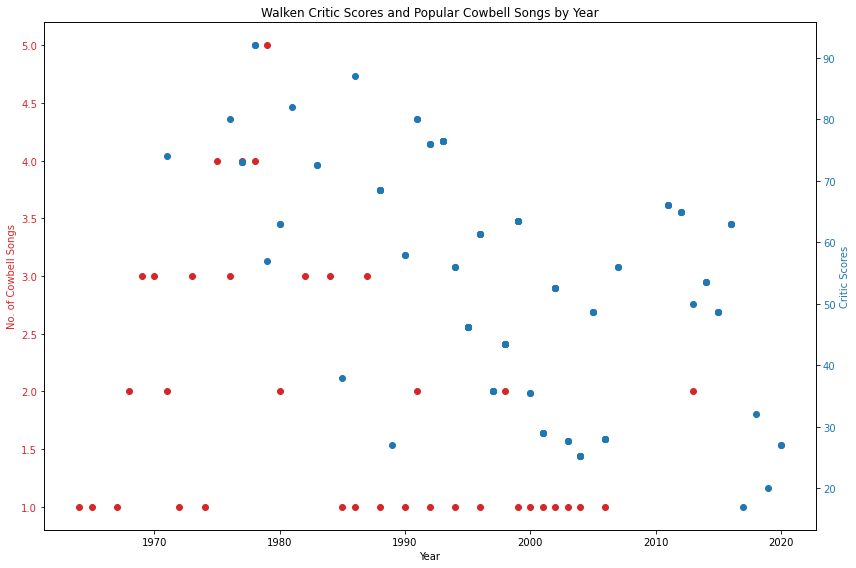

In [31]:
# Add movie revenue if in the same year
year_sorted['crit_avg'] = walken.groupby(['Year'])['Critics_Score'].transform(np.mean)

# Define X and Y
# Cowbell songs by year / count
x = final_list_year['year'].unique()
y = final_list_year['year'].value_counts().sort_index()
# Walken films by year / Critic Score
x2 = year_sorted.Year
y2 = year_sorted.crit_avg * 100

fig, ax1 = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(12)

# Title 
plt.title('Walken Critic Scores and Popular Cowbell Songs by Year')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Cowbell Songs', color=color)
ax1.scatter(x, y, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Critic Scores', color=color)  # we already handled the x-label with ax1
ax2.scatter(x2, y2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

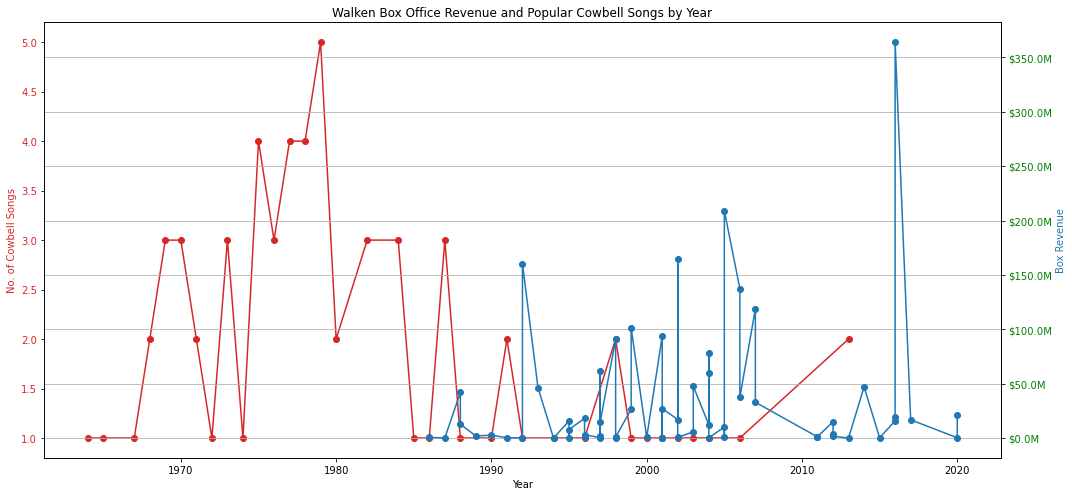

In [53]:
# Define X and Y
# Cowbell songs by year / count
x = np.array(final_list_year['year'].unique()).astype(np.double)
y = np.array(final_list_year['year'].value_counts().sort_index()).astype(np.double)

# Walken films by year / Critic Score
x2 = np.array(year_sorted.Year).astype(np.double)
y2 = np.array(year_sorted.box).astype(np.double)

s1mask = np.isfinite(y)
s2mask = np.isfinite(y2)

fig, ax1 = plt.subplots()

fig.set_figheight(7)
fig.set_figwidth(15)

# Title 
plt.title('Walken Box Office Revenue and Popular Cowbell Songs by Year')

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Cowbell Songs', color=color)
ax1.plot(x[s1mask], y[s1mask], '-o', color=color)
ax1.tick_params(axis='y', labelcolor=color, )

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Box Revenue', color=color)  # we already handled the x-label with ax1
ax2.plot(x2[s2mask], y2[s2mask], '-o', color=color)
#ax2.tick_params(axis='y', labelcolor=color)

# Y ticks
def millions(x, pos):
    """The two args are the value and tick position."""
    return '${:1.1f}M'.format(x*1e-6)

ax2.yaxis.set_major_formatter(millions)
ax2.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.grid()
plt.show()

# CONCLUSION